**Introduction/Business Problem**

With this analysis, I am attempting to develop a model that will reduce the severity of accidents in the current weather conditions. This analysis will help develop a model that will prompt the drivers to be more careful depending on the weather and road conditions on any given day. In this instance, I am using the data from the City of Seattle's police department showing all the collisions from 2004 till present.

**Data Understanding**

Since we are trying to understand the severity of accidents, we will use SEVERITYCODE as our target variable. This is an extensive data set with over 190,000 observations collected over the last 15+ years. To accurately build a model to prevent future accidents and/or reduce their severity, we will use the following attributes - ADDRTYPE,WEATHER, SPEEDING, ROADCOND, VEHCOUNT, PERSONCOUNT

In [3]:
import numpy as np
import pandas as pd

In [7]:
Seattle_AccidentData = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Seattle_AccidentData.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [11]:
Seattle_AccidentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [12]:
Car_Accidents = Seattle_AccidentData[['SEVERITYCODE','ADDRTYPE','WEATHER','SPEEDING','ROADCOND','VEHCOUNT','PERSONCOUNT']]

In [13]:
Car_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   ADDRTYPE      192747 non-null  object
 2   WEATHER       189592 non-null  object
 3   SPEEDING      9333 non-null    object
 4   ROADCOND      189661 non-null  object
 5   VEHCOUNT      194673 non-null  int64 
 6   PERSONCOUNT   194673 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 10.4+ MB


**Data Preparation**

For ease of use we will drop the columns we do not need from the dataset, i.e., columns that do not have values or where the values are unknown. We will drop Speeding entirely because it is missing over 180,000 values and we cannot predict or replace then. For Weather, Roadcond and Addrtype columns we will just drop the values where there is no information. 

In [16]:
Car_Accidents['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [20]:
Car_Accidents.drop('SPEEDING', axis = 1, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
Car_Accidents = Car_Accidents[~Car_Accidents['WEATHER'].isnull()]
Car_Accidents = Car_Accidents[~Car_Accidents['ROADCOND'].isnull()]
Car_Accidents = Car_Accidents[~Car_Accidents['ADDRTYPE'].isnull()]

In [24]:
Car_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187727 entries, 0 to 194672
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  187727 non-null  int64 
 1   ADDRTYPE      187727 non-null  object
 2   WEATHER       187727 non-null  object
 3   ROADCOND      187727 non-null  object
 4   VEHCOUNT      187727 non-null  int64 
 5   PERSONCOUNT   187727 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.0+ MB


Now we will examine the data type in these columns

In [28]:
Car_Accidents['WEATHER'].value_counts()


Clear                       110607
Raining                      33000
Overcast                     27572
Unknown                      14096
Snowing                        902
Other                          796
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [29]:
Car_Accidents['ADDRTYPE'].value_counts()

Block           123481
Intersection     63504
Alley              742
Name: ADDRTYPE, dtype: int64

In [30]:
Car_Accidents['ROADCOND'].value_counts()

Dry               123867
Wet                47256
Unknown            14043
Ice                 1193
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

We notice some unknown data type in WEATHER and ROADCOND columns, so there is still some cleaning of the data to do.

In [32]:
Car_Accidents = Car_Accidents[Car_Accidents['ROADCOND'] != 'Unknown']
Car_Accidents = Car_Accidents[Car_Accidents['WEATHER'] != 'Unknown']

In [33]:
Car_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172242 entries, 0 to 194672
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  172242 non-null  int64 
 1   ADDRTYPE      172242 non-null  object
 2   WEATHER       172242 non-null  object
 3   ROADCOND      172242 non-null  object
 4   VEHCOUNT      172242 non-null  int64 
 5   PERSONCOUNT   172242 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


The above shows us that the data is now ready for use and we can begin our analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['ADDRTYPE'])], axis=1)
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['WEATHER'])], axis=1)
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['ROADCOND'])], axis=1)

In [58]:
Car_Accidents.drop(['ADDRTYPE','WEATHER','ROADCOND'],axis=1,inplace = True)

In [60]:
Car_Accidents_X = Car_Accidents.drop('SEVERITYCODE',axis=1)
Car_Accidents_Y = Car_Accidents['SEVERITYCODE'].values

In [61]:
Car_Accidents_X

,VEHCOUNT,PERSONCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,4,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,3,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,3,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
194669,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
194670,2,3,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
194671,1,2,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
Car_Accidents_Y

array([2, 1, 1, ..., 2, 2, 1])

Text(0.5, 1.0, 'No of Vehicles in Accidents')

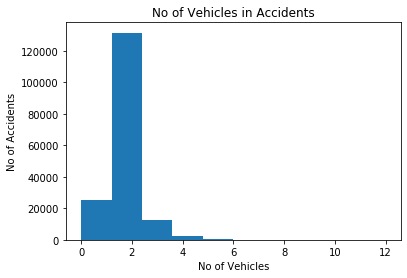

In [64]:
plt.hist(Car_Accidents.VEHCOUNT)
plt.xlabel('No of Vehicles')
plt.ylabel('No of Accidents')
plt.title('No of Vehicles in Accidents')

In [38]:
Car_Accidents.VEHCOUNT.value_counts()

2     131484
1      24789
3      12650
4       2382
5        522
0        193
6        143
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

Text(0.5, 1.0, 'No of Vehicles in Accidents')

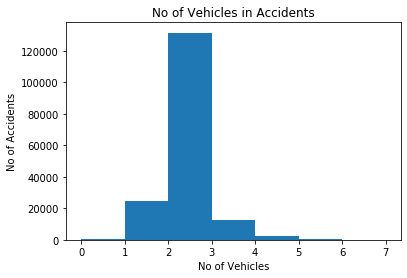

In [39]:
bins = np.arange(Car_Accidents.PERSONCOUNT.min(), 8, 1)
plt.hist(Car_Accidents.VEHCOUNT,bins = bins)
plt.xlabel('No of Vehicles')
plt.ylabel('No of Accidents')
plt.title('No of Vehicles in Accidents')

We see that in most accidents 2-3 cars are involved.

Text(0.5, 1.0, 'No of people in Accidents')

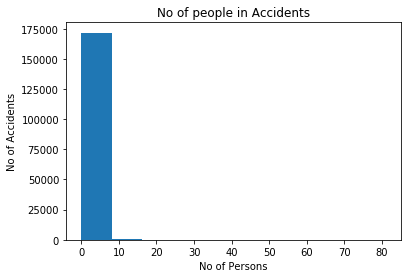

In [40]:
plt.hist(Car_Accidents.PERSONCOUNT)
plt.xlabel('No of Persons')
plt.ylabel('No of Accidents')
plt.title('No of people in Accidents')

In [41]:
Car_Accidents.PERSONCOUNT.value_counts()

2     95947
3     34189
4     14214
1     11182
5      6493
0      5321
6      2673
7      1118
8       528
9       213
10      128
11       55
12       33
13       21
14       19
15       11
17       11
16        8
44        6
18        6
20        6
25        6
19        5
26        4
22        4
27        3
28        3
29        3
47        3
32        3
34        3
37        3
23        2
21        2
24        2
30        2
36        2
57        1
31        1
35        1
39        1
41        1
43        1
48        1
53        1
54        1
81        1
Name: PERSONCOUNT, dtype: int64

Text(0.5, 1.0, 'No of people in Accidents')

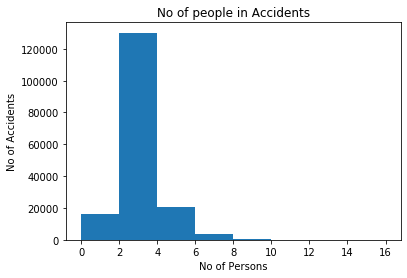

In [43]:
bins = np.arange(Car_Accidents.PERSONCOUNT.min(), 17, 2)
plt.hist(Car_Accidents.PERSONCOUNT,bins = bins)
plt.xlabel('No of Persons')
plt.ylabel('No of Accidents')
plt.title('No of people in Accidents')

We see that the number of people involved in most accidents is 2-4

Text(0.5, 1.0, 'No of Accidents in relation to the location')

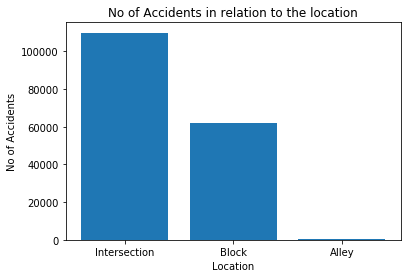

In [44]:
X = Car_Accidents.ADDRTYPE.unique()
Data = Car_Accidents.ADDRTYPE.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Location')
plt.ylabel('No of Accidents')
plt.title('No of Accidents in relation to the location')

We see that most accidents occur on an intersection

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

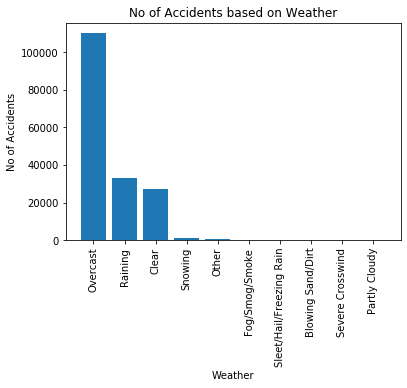

In [45]:
X = Car_Accidents.WEATHER.unique()
Data = Car_Accidents.WEATHER.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Weather')
plt.ylabel('No of Accidents')
plt.title('No of Accidents based on Weather')
plt.xticks(rotation = 90)

Surprisingly most accidents occur during overcast weather and not rainy or snowy weather. This is somewhat unexpected.

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

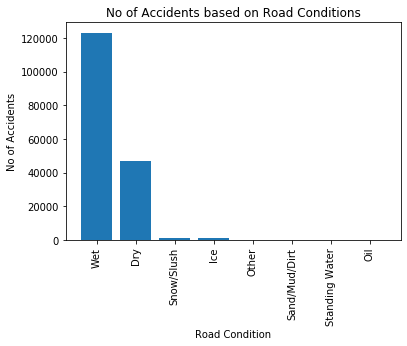

In [47]:
X = Car_Accidents.ROADCOND.unique()
Data = Car_Accidents.ROADCOND.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Road Condition')
plt.ylabel('No of Accidents')
plt.title('No of Accidents based on Road Conditions')
plt.xticks(rotation = 90)

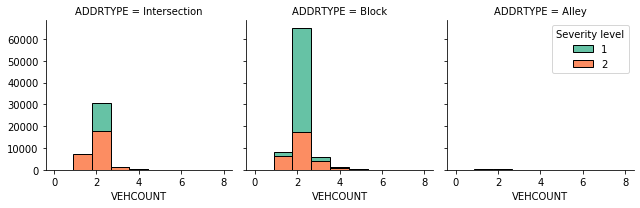

In [52]:
bins = np.linspace(Car_Accidents.VEHCOUNT.min(), 8, 10)
g = sns.FacetGrid(Car_Accidents, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=3)
g.map(plt.hist, 'VEHCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

We notice that severity of accidents in higher on an intersection whereas most non-severe accidents occur on blocks.

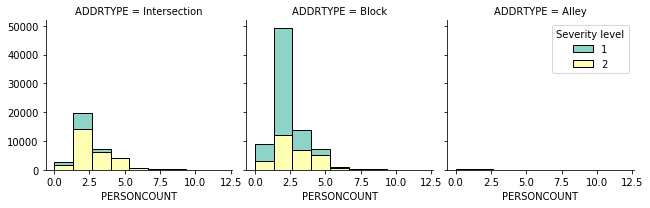

In [56]:
bins = np.linspace(Car_Accidents.PERSONCOUNT.min(), 12, 10)
g = sns.FacetGrid(Car_Accidents, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set3", col_wrap=3)
g.map(plt.hist, 'PERSONCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

Here we see that most severe accidents occur on intersections with 2-3 people.

**Discussion**

At the start of our analysis we were trying to figure out the severity and frequency of road accidents based on weather conditions, road conditions and other factors. Even though our data was a good size, there were a number of missing elements and we needed to clean the data in order to get a good result. We had to drop 'SPEED' factor because there were too many missing elements but I think that is another big factor that should be considered.

**Conclusion**

Based on our analysis we can clearly see that most severe accidents occur on intersection. Wet road conditions and overcast weather are big contributing factors. These findings can be helpful to the Seattle PD in enforcing some new measures to prevent future accidents.